In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('titanic.csv')
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
label=LabelEncoder()
data['Sex']=label.fit_transform(data['Sex'])
data['Embarked']=label.fit_transform(data['Embarked'])
x=data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y=data['Survived'].values

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000,random_state=42)
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [4]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7988826815642458


In [5]:
new_data = {
    'Pclass': [2],
    'Sex': [0],  # 0 for female, 1 for male
    'Age': [35],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [25.5],
    'Embarked': [1]  # 1 represents 'Q' after label encoding
}

In [6]:
new_f=pd.DataFrame(new_data)
pred=model.predict(new_f.values)
if pred[0]==1:
    print('s')
else:
    print('n')

s


MLPClassifier Model Details:
Number of layers: 3
Number of outputs: 1
Number of iterations: 637
Activation function: relu
Hidden layer sizes: (10,)


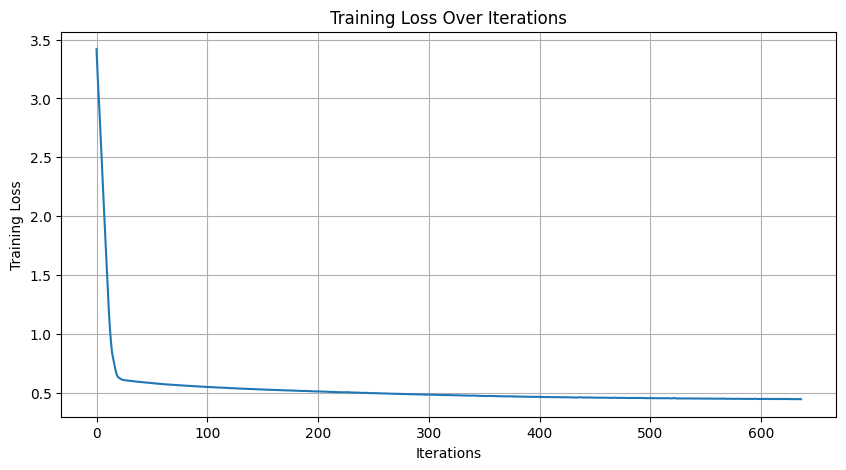

In [9]:
print("MLPClassifier Model Details:")
print("Number of layers:", model.n_layers_)
print("Number of outputs:", model.n_outputs_)
print("Number of iterations:", model.n_iter_)
print("Activation function:", model.activation)
print("Hidden layer sizes:", model.hidden_layer_sizes)
import matplotlib.pyplot as plt
# For plotting, you can plot the training loss versus iterations
plt.figure(figsize=(10, 5))
plt.plot(model.loss_curve_)
plt.title("Training Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")
plt.grid(True)
plt.show()
